# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

In [18]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


/tmp/ipykernel_1665/1529239179.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

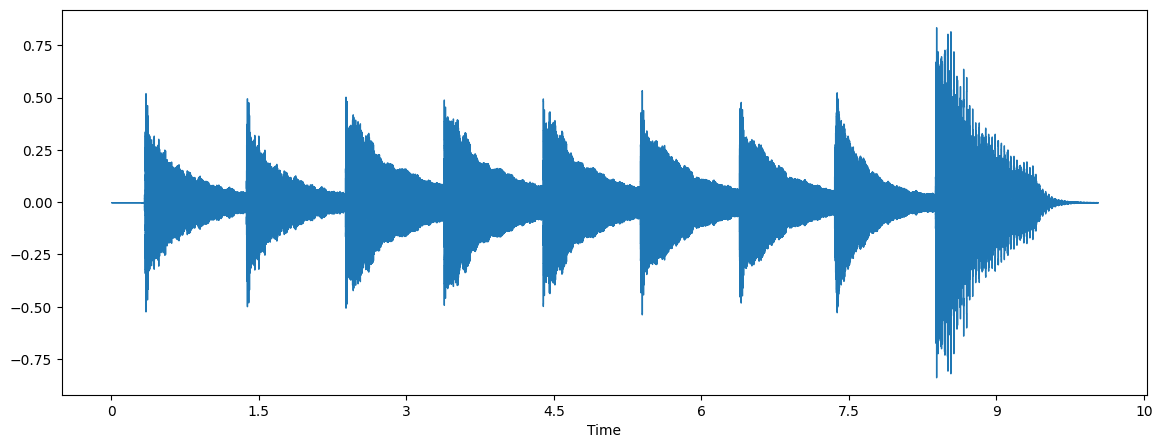

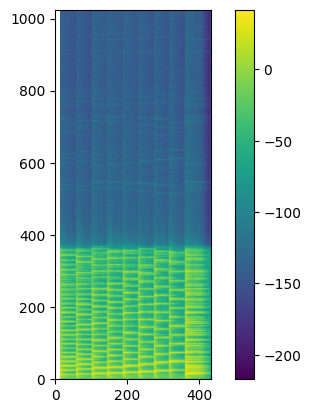

In [19]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


## 2. Implement MUR for NMF with beta-divergence 

In [20]:
def MUR(X, K, beta, number_inter):
    
    I, J = X.shape

    W = np.abs(np.random.normal(size=(I, K))) + 0.1
    H = np.abs(np.random.normal(size=(K, J))) + 0.1

    W_final = W.copy()
    H_final = H.copy()

    norm = []
    iter = 0
    norm_matrix = np.linalg.norm(X - W @ H) 

    while iter < number_inter:

        X_hat = W @ H
        
        W_final = W.copy()
        H_final = H.copy()

        W *= ((X * X_hat**(beta - 2)) @ H.T + 0.1) / (X_hat**(beta - 1) @ H.T + 0.1)
        H *= (W.T @ (X * X_hat**(beta - 2) + 0.1)) / (W.T @ X_hat**(beta - 1) + 0.1) 
        
        W /= np.sum(W, axis=0, keepdims=True)
        H *= np.sum(W, axis=0, keepdims=True).T

        result = W @ H
        norm_matrix = np.linalg.norm(X - result)

        if iter % 10 == 0:
            print(f"The distance between the real matrix and W @ H is {norm_matrix}")
            
        norm.append(norm_matrix)
        
        iter += 1
        
    return W_final, H_final, norm

## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

The distance between the real matrix and W @ H is 924.4869925618437
The distance between the real matrix and W @ H is 195.9385017833991
The distance between the real matrix and W @ H is 116.7392069048346
The distance between the real matrix and W @ H is 88.13037071256235
The distance between the real matrix and W @ H is 73.53595891123315
The distance between the real matrix and W @ H is 64.32301276686694
The distance between the real matrix and W @ H is 57.81575995711386
The distance between the real matrix and W @ H is 53.03862053071254
The distance between the real matrix and W @ H is 49.25297491797912
The distance between the real matrix and W @ H is 46.25595853352173
The distance between the real matrix and W @ H is 43.856247395387086
The distance between the real matrix and W @ H is 41.85644036445895
The distance between the real matrix and W @ H is 40.16728798258444
The distance between the real matrix and W @ H is 38.7113797183866
The distance between the real matrix and W @ H i

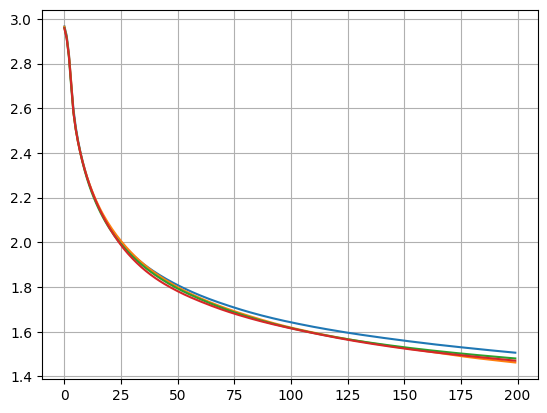

In [38]:
X_real = np.real(Xstft)
X_imag = np.imag(Xstft)

X_real_pos = np.maximum(0, X_real)
X_real_neg = np.maximum(0, -X_real)

X_imag_pos = np.maximum(0, X_imag)
X_imag_neg = np.maximum(0, -X_imag)

W_real_pos, H_real_pos, norms_real_pos = MUR(X_real_pos, 500, beta=2, number_inter= 200)
W_real_neg, H_real_neg, norms_real_neg = MUR(X_real_neg, 500, beta=2, number_inter= 200)

W_image_pos, H_image_pos, norms_imag_pos = MUR(X_imag_pos, 500, beta=2, number_inter= 200)
W_imag_neg, H_imag_neg, norms_imag_neg = MUR(X_imag_neg, 500, beta=2, number_inter= 200)

plt.plot(np.log10(norms_real_pos))
plt.plot(np.log10(norms_real_neg))
plt.plot(np.log10(norms_imag_pos))
plt.plot(np.log10(norms_imag_neg))
plt.grid()
plt.show()

66.67131580720752


/tmp/ipykernel_1665/286144451.py:17: RuntimeWarning: divide by zero encountered in log10
  ax[1].imshow(20*np.log10(np.abs(Xstft)), origin = "lower")


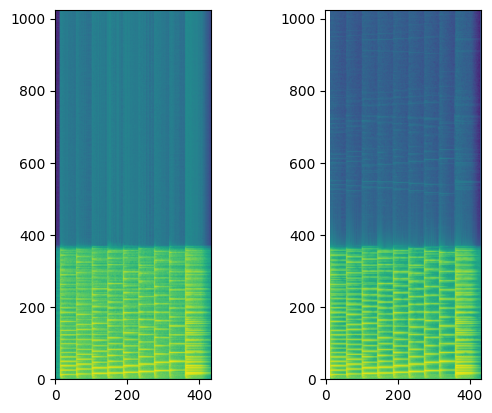

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols= 2)

X_real_pos_recon = W_real_pos @ H_real_pos
X_real_neg_recon = W_real_neg @ H_real_neg

X_imag_pos_recon = W_image_pos @ H_image_pos
X_imag_neg_recon = W_imag_neg @ H_imag_neg

X_reconstruct_real = X_real_pos_recon - X_real_neg_recon
X_reconstruct_img = X_imag_pos_recon - X_imag_neg_recon

X_reconstruct = X_reconstruct_real + 1j*X_reconstruct_img

print(np.linalg.norm(X_reconstruct - Xstft))

ax[0].imshow(20*np.log10(np.abs(X_reconstruct)), origin= "lower")
ax[1].imshow(20*np.log10(np.abs(Xstft)), origin = "lower")
plt.show()

<Figure size 640x480 with 0 Axes>

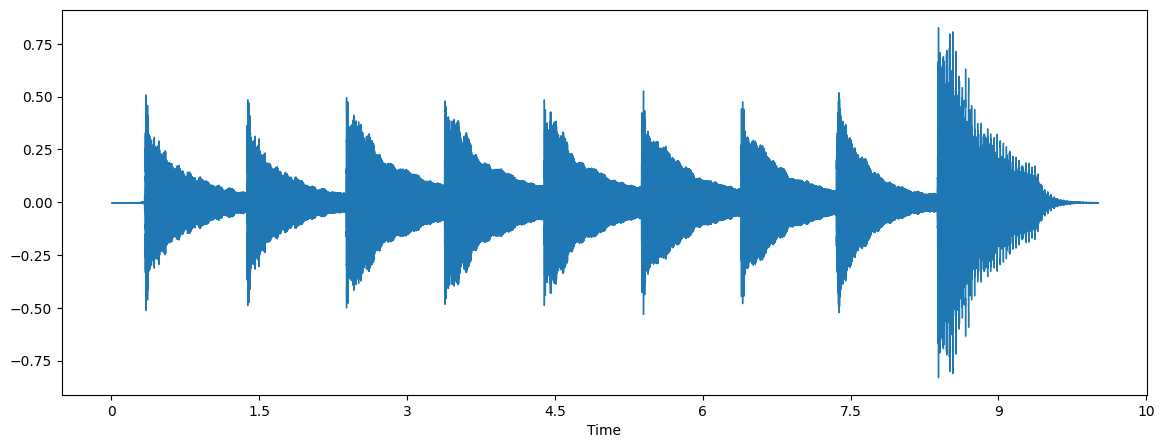

In [40]:
signal = librosa.istft(X_reconstruct)
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=sr)
ipd.Audio(signal, rate=sr)

<Figure size 640x480 with 0 Axes>

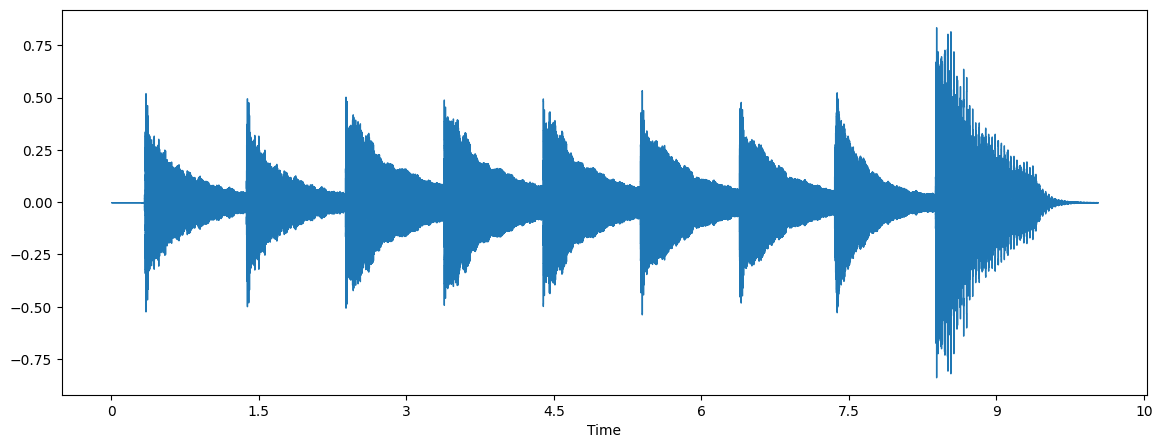

In [32]:
# Example reconstruction
y_hat = librosa.istft(Xstft)
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(y_hat, rate=sr)